# Data Acquistion


Data was scraped from the research paper (Please cite this article as: Z. Zhang, Z. Zhao, B. Wang, J. Zhang, Boron Based Hypergolic Ionic Liquids:
A Review, Green Energy & Environment, https://doi.org/10.1016/j.gee.2020.12.002.)

In [21]:
# loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import  XGBRegressor
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

In [66]:
#import library for scraping
import tabula

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# provide file path
file = r"C:\Users\valer\OneDrive\Desktop\USA application\boron.pdf"

#specify pages for scraping
pages = [21,22,23,24,25,26,27]

# get the datasets lists
df = tabula.read_pdf(file, pages = pages,  multiple_tables=True, encoding = 'ISO-8859-1', silent=True)

In [67]:
# create dataframes from a list

def list_to_df(df):
    d = 0
    data = pd.DataFrame()
    lst = []
    
    # iterate across all dfs in list (12)
    while d < 12:
        data = df[d]
        
        # append each of dfs to a list
        lst.append(data)
        data = pd.DataFrame()
        d += 1
        
    return lst

In [68]:
lst = list_to_df(df)

In [69]:
# create a list of columns to delete

def col_to_delete():
    
    # list of columns to delete
    to_delete = [3,4,6,8,11,12,15,16,17]

    new_list = []
    
    # iterate across a list and assign columns
    for i in to_delete:
        res = 'Unnamed: {}'.format(i)
        new_list.append(res)
        res = ''
        
    return new_list

In [70]:
new_list = col_to_delete()
new_list

['Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 6',
 'Unnamed: 8',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17']

In [71]:
# prepare dataframes

def columns_removal(lst):
    
    # prepare df1
    new_columns = [i for i in lst[0].columns if i not in new_list]
    new = pd.DataFrame()
    new = lst[0].filter(new_columns, axis=1)
    new.drop('Unnamed: 0', axis = 1, inplace = True)
    
    # prepare df2
    new1 = lst[2].drop(columns = ['Unnamed: 1', 'Unnamed: 5'])
    
    # prepare df3
    new2 = lst[3].drop(columns = ['Unnamed: 3', 'Unnamed: 4'])
    
    # prepare df4
    new3 = lst[5].drop(columns = ['Unnamed: 0'])
    
    # prepare df5
    new4 = lst[7].drop(columns = ['Unnamed: 0'])
    
    # prepare df6
    new5 = lst[8].drop(columns = ['Unnamed: 0'])
    
    # prepare df7
    new6 = lst[11]
    
    dataframes = [new, new1, new2, new3, new4, new5, new6]
    
    return dataframes

In [72]:
dataframes = columns_removal(lst)

In [73]:
# check if columns have same length

def same_length(dataframes):
    count = 0
    
    # iterate across dataframes
    for data in dataframes:
        length = len(data.columns)
        print('the length of dataframe {} is {}'.format(count, length))
        length = 0
        count += 1


In [74]:
same_length(dataframes)

the length of dataframe 0 is 9
the length of dataframe 1 is 9
the length of dataframe 2 is 9
the length of dataframe 3 is 9
the length of dataframe 4 is 9
the length of dataframe 5 is 9
the length of dataframe 6 is 9


In [75]:
# rename dataframes columns

def rename_columns(dataframes):
    for data in dataframes:
        data.columns = range(1,10)
    return dataframes

In [76]:
dataframes = rename_columns(dataframes)

In [77]:
# concatenate dataframes

def concat_dataframes(dataframes):
    total = pd.concat(dataframes, sort=False)
    return total

In [78]:
total = concat_dataframes(dataframes)
total

,1,2,3,4,5,6,7,8,9
0,Anion,NaN,NaN,-3,NaN,NaN,NaN,NaN,Ref
1,NaN,( ),),(g cm ) (mPa s),-1 ) o(KJ mol,-1,(ms),(s),NaN
2,[BH2(CN)2],< -80,307,0.96 17.3,NaN,NaN,28,NaN,26
3,[BH2(CN)2],< -80,222,0.91 3e9.4 -,NaN,NaN,6,NaN,26
4,[BH2(CN)2],< -80,189,0.93 r35.0,NaN,NaN,4,NaN,26
5,[BH2(CN)2] [BH2(CN)2],< -80 < -80,266 l 2a52,0P.99 0.96 12.4 19.8,NaN,NaN,8 18,NaN,26 26
6,[BH2(CN)2],< -80,203,1.00 13.5,NaN,NaN,6,NaN,26
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,[BH2(CN)2] urn< -80,NaN,303,0.92 22.3,NaN,NaN,26,NaN,26
9,[BH2J(CN)o2],< -80,259,0.94 16.6,NaN,NaN,8,NaN,26


In [79]:
#save data to csv
total.to_csv('cleaned_df.csv')

pd.set_option('display.max_rows', None)

# Data Cleaning

In [80]:
import pandas as pd
df = pd.read_csv(r'C:\Users\valer\OneDrive\Desktop\Python\cleaned.csv')

Cleaning plan

1. Delete a column Unnamed: 0, row 1, and reindex rows starting from 0
2. Column 1: leave only information that are in brakets. Write a function that will calculate the number of square brakets, if values are negative, create the column with bool, true/false values
3. column 2: remove '<' and other symbols except numbers, leave negative signs as they are. Must have only negative values with two digits, round values to integers
4. column 3: remove all unneccessary symbols, leave only numbers
5. column 4: split it in two columns as it has two values in the column. Leave only numbers
6. column 5: must contain only integers, convert to abs value
7. column 6: values must be an the order of thousands and negative. Replace all others with None
8. column 7: must contain only integers
9. column 8: must contain only integers
10. check if they are duplicates, Split the columns if a row has merged values like row 5, make sure to split it in,if so, drop duplicates


In [81]:
df.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9
0,0,Anion,NaN,NaN,-3,NaN,NaN,NaN,NaN,Ref
1,1,NaN,( ),),(g cm ) (mPa s),-1 ) o(KJ mol,-1.0,(ms),(s),NaN
2,2,[BH2(CN)2],< -80,307,0.96 17.3,NaN,NaN,28,NaN,26
3,3,[BH2(CN)2],< -80,222,0.91 3e9.4 -,NaN,NaN,6,NaN,26
4,4,[BH2(CN)2],< -80,189,0.93 r35.0,NaN,NaN,4,NaN,26


In [82]:
# Delete Unnamed: 0, row 1, and reindex rows starting from 0

df.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop(0, axis = 0, inplace = True)

# list of elements to count
brakets = ['[', ']']

count = 0

# count the brakets, if count of values is less than 2, return 0 
# a cell cannot have a formula with less than 2 brakets
def new(df):
    
    count = 0
    
    # iterate across rows
    for row in range(df.shape[0]):
        
        # get each cell
        ele = str(df.iloc[row, 0])
        
        # check if cell has brakets
        for j in range(len(ele)):

            if ele[j] in brakets:
                count += 1
        # if number of brakets is less than 2, convert value to zero
        if count < 2: 
            df.iloc[row, 0] = 0

        ele = ''
        count = 0
        dfnew = df.copy()
        
    return dfnew

dfnew = new(df)

# assign column bool True if value is negative, else put False
dfnew['1'] = dfnew['1'].astype(str)
dfnew['bool'] = dfnew['1'].apply(lambda x: True if '-' in x else False)

# clean '1' column from negative signs
dfnew['1'] = dfnew['1'].str.replace('-', '')

# extract number to  separate columns from column 1
dfnew['numbers'] = dfnew['1'].str.replace('\[.+]', '')

# replace digits at the end of a cell with empty space
dfnew['1'] = dfnew['1'].str.replace('\d+\s', '')

# convert to numeric
dfnew['numbers'] = pd.to_numeric(dfnew['numbers'], errors='coerce')

In [83]:
# column 2: remove '<' and other symbols except numbers, leave negative signs as they are.

# replace '<' with empty space
dfnew['2'] = dfnew['2'].str.replace('<', '')

# convert to numeric
dfnew['2'].fillna(0, inplace = True)
dfnew['2'] = pd.to_numeric(dfnew['2'], errors='coerce')

In [84]:
# column 3: remove all unneccessary symbols, leave only numbers

# convert to numeric
dfnew['3'] = pd.to_numeric(dfnew['3'], errors='coerce')

In [85]:
# column 4: split it in two columns as it has two values in the column. Leave only numbers

# get two new columns
dfnew['4_1'] = dfnew['4'].str.split(' ', expand = True)[0]
dfnew['4_2'] = dfnew['4'].str.split(' ', expand = True)[1]

# drop unnecessary column
dfnew.drop('4', axis = 1, inplace = True)

# extract numbers from the newly formed columns
dfnew['4_1'] = dfnew['4_1'].str.extract(r'(\d+\.\d+)')
dfnew['4_2'] = dfnew['4_2'].str.extract(r'(\d+\.\d+)')

# convert to numeric and get the absolute values
dfnew['5'] = pd.to_numeric(dfnew['5'], errors='coerce')
dfnew['5'] = dfnew['5'].apply(lambda x: abs(x))


In [86]:
# column 6: values must be an the order of thousands and negative

# filter columns based on the negative sign
dfnew['6'] = dfnew['6'].apply(lambda x: x if '-' in str(x) else None)

# convert to numeric
dfnew['6'] = pd.to_numeric(dfnew['6'], errors='coerce')

# convert values that are less than 1000 to None
dfnew['6'] = dfnew['6'].apply(lambda x: x if x < -1000 else None)

# convert to numeric
dfnew['7'] = pd.to_numeric(dfnew['7'], errors='coerce')
dfnew['8'] = pd.to_numeric(dfnew['8'], errors='coerce')


dfnew.drop(1, axis = 0, inplace = True)
dfnew.fillna(0, inplace = True)

# convert type to numeric
dfnew['7'] = dfnew['7'].astype(int)
dfnew['8'] = dfnew['8'].astype(int)

# get two rows from a row with merged cells
dfnew = dfnew.set_index(['2','3','5','6','7','8','9', 'bool','numbers', '4_1', '4_2']).\
apply(lambda x: x.str.split(' ').explode()).reset_index()

In [87]:
# check for duplicates
dfnew.drop_duplicates(inplace = True, keep = 'last')

# drop a row if it does not contain a formula (brakets presence)
dfnew['1'] = dfnew['1'].apply(lambda x: x if '[' and ']' in x else 'No')

# filter a df based on the brakets presence
df_final = dfnew[dfnew['1'] != 'No']

# insert a column to the beginning of df
df_final.insert(0, 'Formula', df_final['1'])


df_final.drop('1', axis = 1, inplace = True)


# Cleaned dataframe


In [88]:
df_final

,Formula,2,3,5,6,7,8,9,bool,numbers,4_1,4_2
0,[BH2(CN)2],-80.0,307.0,0.0,0.0,28,0,26,False,0.0,0.96,17.3
1,[BH2(CN)2],-80.0,222.0,0.0,0.0,6,0,26,False,0.0,0.91,9.4
2,[BH2(CN)2],-80.0,189.0,0.0,0.0,4,0,26,False,0.0,0.93,35.0
5,[BH2(CN)2],0.0,0.0,0.0,0.0,0,0,26 26,False,0.0,0,0.96
6,[BH2(CN)2],-80.0,203.0,0.0,0.0,6,0,26,False,0.0,1.00,13.5
8,[BH2(CN)2],0.0,303.0,0.0,0.0,26,0,26,True,0.0,0.92,22.3
12,[BH2J(CN)o2],-80.0,259.0,0.0,0.0,8,0,26,False,0.0,0.94,16.6
13,[BH2(CN)2],-80.0,220.0,0.0,0.0,32,0,26,False,0.0,0.99,29.9
16,[BH2(CN)2],-80.0,217.0,0.0,0.0,6,0,26,False,0.0,1.03,21.0
17,[BH3CN],0.0,181.0,154.9,-5439.0,42,214,29,False,0.0,0.93,0


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel(r'C:\Users\valer\Desktop\Projects\liquids\full.xlsx', header = None)

In [11]:
df = df.iloc[2:, 2:]

In [12]:
# assign new columns names

columns_to_assing = ['ID',
'glass transition temperature',
'decomposition temperture',
'density',
'viscosity',
'energy of formation',
'energy of combustion',
'ignition delay',
'specific impulse',
'impulase of propellant',
'reference']

df.columns = columns_to_assing

df.columns = [i.replace(' ', '_') for i in df.columns]
df = df.astype(str)

In [13]:
def prepare_for_type_conversion(df):
    for col in df.columns:
        df[col] = df[col].str.replace(',', '.')
    return df


def values_to_numberic_type(df):
    for col in df.columns:
        df[col] = df[col].astype(float)
    return df

In [14]:
df = prepare_for_type_conversion(df)

In [15]:
df = values_to_numberic_type(df)

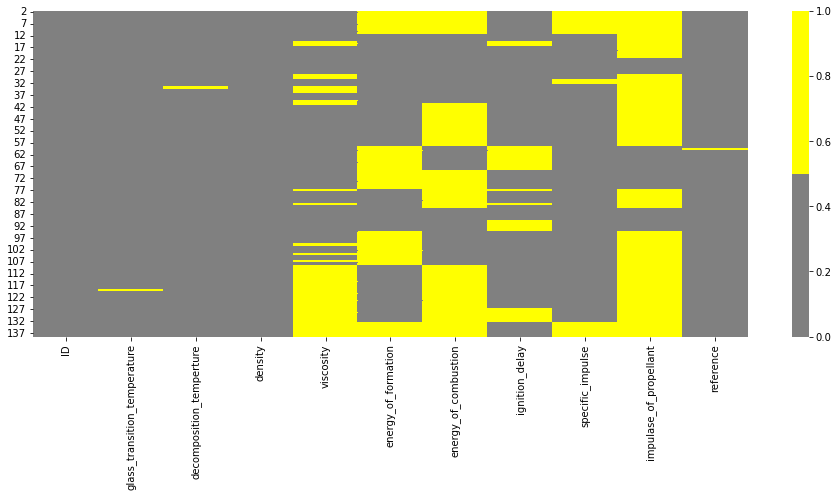

In [19]:
#working with missing values
plt.figure(figsize=(16, 6))

cols = df.columns 
colours = ['grey', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [22]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)
print()
print('Numeric columns:')
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)
print()
print('Non-numeric columns:')
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

print()
print()
def non_numeric(df):
    '''
    checking null values
    '''
    df_numeric = df.select_dtypes(include=[np.number])
    
    if df_numeric.isnull().sum().sum() > 0:
        total_numeric = df_numeric.isnull().sum().sort_values(ascending=False) 
        total = total_numeric[total_numeric > 0]

        percent = df_numeric.isnull().mean().sort_values(ascending=False) 
        percent_ready = percent[percent > 0] 

        missing_data_numeric = pd.concat([total, percent_ready], axis=1, keys=['Total', 'Percent_ready'])
    
        print(missing_data_numeric)
    else: 
        print('No Missing values found in numeric.')
        
def numeric(df):
    '''
    checking null values
    '''
    df_non_numeric = df.select_dtypes(exclude=[np.number])
    
    if df_non_numeric.isnull().sum().sum() > 0:
        total_non_numeric = df_non_numeric.isnull().sum().sort_values(ascending=False) 
        total = total_non_numeric[total_non_numeric > 0]

        percent = df_non_numeric.isnull().mean().sort_values(ascending=False) 
        percent_ready = percent[percent > 0] 

        missing_data_non_numeric = pd.concat([total, percent_ready], axis=1, keys=['Total', 'Percent_ready'])
    
        print(missing_data_non_numeric)
    else: 
        print('No Missing values found in numeric.')

print('Total and Percentage of Missing values in numeric:\n')
non_numeric(df)
print()
print()
print()
print('Total and Percentage of Missing values in non numeric:\n')
numeric(df)

(137, 11)
ID                              float64
glass_transition_temperature    float64
decomposition_temperture        float64
density                         float64
viscosity                       float64
energy_of_formation             float64
energy_of_combustion            float64
ignition_delay                  float64
specific_impulse                float64
impulase_of_propellant          float64
reference                       float64
dtype: object

Numeric columns:
['ID' 'glass_transition_temperature' 'decomposition_temperture' 'density'
 'viscosity' 'energy_of_formation' 'energy_of_combustion' 'ignition_delay'
 'specific_impulse' 'impulase_of_propellant' 'reference']

Non-numeric columns:
[]


Total and Percentage of Missing values in numeric:

                              Total  Percent_ready
impulase_of_propellant          102       0.744526
energy_of_combustion             74       0.540146
energy_of_formation              48       0.350365
viscosity                   

In [23]:
def drop_na(df):

    for column in df.columns:
        if df[column].isnull().sum()/df.shape[0] > 0.70:
            df.drop(columns=[column], axis = 1, inplace = True)
            
    return df

df = drop_na(df)

Types of missing data

It is usual to define three kinds of missing data:

1. missing completely at random (MCAR); 
2. missing at random (MAR); 
3. missing not at random (MNAR).

In our case the researchers could not measure the data for some reasons: compounds instability and so on

so, the missing data is MNAR

What the the most important columns that we need to encode

- high energy of combusion
- low density
- low viscosity
- short iginition delays
- thermal stability

In [24]:
#dropping columns
def drop_nan(df, variable):
    df[variable+'_dropped'] = df[variable].dropna()
    return df


# mean imputation
def impute_nan_mean(df, variable):
    mean = df[variable].mean()
    df[variable+'_mean'] = df[variable].fillna(mean)
    return df


# mode imputation
def impute_nan_mode(df, variable):
    mode = df[variable].mode()
    df[variable+'_mode'] = df[variable].fillna(mode)
    return df



# median imputation
def impute_nan_median(df, variable):
    median = df[variable].median()
    df[variable+'_median'] = df[variable].fillna(median)
    return df

# Random sample imputation peaks random data to replace the nan values applied for MCAR
def impute_nan_random(df,col):
    median = df[col].median()
    df[col+"_median"]=df[col].fillna(median)
    df[col+"_random"]=df[col]
    random_sample=df[col].dropna().sample(df[col].isnull().sum(),random_state=0, replace=True)
    random_sample.index=df[df[col].isnull()].index
    df.loc[df[col].isnull(),col+'_random']=random_sample
    return df

# KNN imputation
def impute_KNN(df, col):
    from sklearn.impute import KNNImputer
    knn_imputer = KNNImputer(n_neighbors=3)
    inputt = df[col].values.reshape(-1,1)
    knn_imputer.fit(inputt)
    knn_imputer.transform(inputt)
    df[col+'_KNN'] = inputt 
    return df

# group by Sex and Class
def impute_ID(df,col, col2):
    grouped = df.groupby([col2])  
    # view the median by the grouped features 
    grouped[col].median()
    # apply the grouped median value on the Age NaN
    df[col +'_' + col2] = grouped[col].apply(lambda x: x.fillna(x.median()))
    return df


# impute by decomposition temp
def impute_decomposition_temperture(df,col, col2):
    grouped = df.groupby([col2])  
    # view the median  the grouped features 
    grouped[col].median()
    # apply the grouped median value on the Age NaN
    df[col + '_' + col2] = grouped[col].apply(lambda x: x.fillna(x.median()))
    return df



# regression_imputer
def Regression(df, col):
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer

    reg_imputer = IterativeImputer(max_iter=10, random_state=123)
    vals = df[col].values.reshape(-1,1)
    reg_imputer.fit(vals)
    df[col +'regression'] = reg_imputer.transform(vals)
    return df

# impute by outliers
def impute_col_by_extreme(df, col):
    extreme = df[col].mean() + 3*df[col].std()
    df[col+'_extreme'] = df[col].fillna(extreme)
    return df


def impute_Age_Datawig(df,col, col2, col3):
    import datawig
    #Initialize a SimpleImputer model
    imputer = datawig.SimpleImputer(
        input_columns=[col2, col3], # column(s) containing information about the column we want to impute
        output_column= col, # the column we'd like to impute values for
        output_path = 'imputer_model' # stores model data and metrics
    )

    #Fit an imputer model on the train data
    imputer.fit(train_df=df, num_epochs=5)

    #Impute missing values and return original dataframe with predictions
    df = imputer.predict(df)
    
    return df

In [29]:
var = 'energy_of_combustion'

drop_nan(df, var)
impute_nan_mean(df, var)
impute_nan_mode(df, var)
impute_nan_median(df, var)
impute_nan_random(df,var)
impute_KNN(df, var)
impute_ID(df,var, 'ignition_delay')
impute_decomposition_temperture(df,var, 'decomposition_temperture')
Regression(df, var)
impute_col_by_extreme(df, var)

,ID,glass_transition_temperature,decomposition_temperture,density,viscosity,energy_of_formation,energy_of_combustion,ignition_delay,specific_impulse,reference,energy_of_combustion_dropped,energy_of_combustion_mean,energy_of_combustion_mode,energy_of_combustion_median,energy_of_combustion_random,energy_of_combustion_KNN,energy_of_combustion_ignition_delay,energy_of_combustion_decomposition_temperture,energy_of_combustionregression,energy_of_combustion_extreme
2,1.0,-80.0,307.0,0.960,17.3,NaN,NaN,28.0,NaN,26.0,NaN,-5136.509873,NaN,-6270.0,100703.000,NaN,-9200.9,NaN,-5136.509873,50229.062796
3,2.0,-80.0,222.0,0.910,39.4,NaN,NaN,6.0,NaN,26.0,NaN,-5136.509873,NaN,-6270.0,-14011.600,NaN,NaN,2.564,-5136.509873,50229.062796
4,3.0,-80.0,189.0,0.930,35.0,NaN,NaN,4.0,NaN,26.0,NaN,-5136.509873,NaN,-6270.0,-7306.200,NaN,-2622.0,NaN,-5136.509873,50229.062796
5,4.0,-80.0,266.0,0.990,12.4,NaN,NaN,8.0,NaN,26.0,NaN,-5136.509873,NaN,-6270.0,-5439.000,NaN,-6944.0,NaN,-5136.509873,50229.062796
6,5.0,-80.0,252.0,0.960,19.8,NaN,NaN,18.0,NaN,26.0,NaN,-5136.509873,NaN,-6270.0,-4744.000,NaN,-7306.2,NaN,-5136.509873,50229.062796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,133.0,231.0,234.2,1.221,NaN,NaN,NaN,4.0,NaN,66.0,NaN,-5136.509873,NaN,-6270.0,-7306.200,NaN,-2622.0,NaN,-5136.509873,50229.062796
135,134.0,196.7,250.0,1.217,NaN,NaN,NaN,14.0,NaN,66.0,NaN,-5136.509873,NaN,-6270.0,-8605.000,NaN,NaN,NaN,-5136.509873,50229.062796
136,135.0,205.2,274.2,1.215,NaN,NaN,NaN,19.0,NaN,66.0,NaN,-5136.509873,NaN,-6270.0,2.555,NaN,-9268.9,NaN,-5136.509873,50229.062796
137,136.0,269.3,286.3,1.219,NaN,NaN,NaN,1.0,NaN,66.0,NaN,-5136.509873,NaN,-6270.0,10370.400,NaN,NaN,NaN,-5136.509873,50229.062796


In [30]:
def missing(df):

    for column in df.columns[10:]:
        res = df[column].isnull().sum()/df.shape[0]
        print('Missing in ' + column, res)
        
        res = 0

missing(df)

Missing in energy_of_combustion_dropped 0.5401459854014599
Missing in energy_of_combustion_mean 0.0
Missing in energy_of_combustion_mode 0.5401459854014599
Missing in energy_of_combustion_median 0.0
Missing in energy_of_combustion_random 0.0
Missing in energy_of_combustion_KNN 0.5401459854014599
Missing in energy_of_combustion_ignition_delay 0.5255474452554745
Missing in energy_of_combustion_decomposition_temperture 0.48175182481751827
Missing in energy_of_combustionregression 0.0
Missing in energy_of_combustion_extreme 0.0


So only mean, median, random, regression and extreme imputations worked out lets plot them

In [31]:

def energy_of_combustion_dropped_nan_distribution(df):
    


    columns_to_plot = ['energy_of_combustion_mean',
            'energy_of_combustion_median',
           'energy_of_combustion_random', 
          
           'energy_of_combustionregression', 'energy_of_combustion_extreme']

    import matplotlib.pyplot as plt


    for col in columns_to_plot:


        fig = plt.figure(figsize = (15,7))
        ax = fig.add_subplot(111)
        df['energy_of_combustion'].plot(kind='kde', ax=ax, color = 'magenta', linewidth=17, alpha=0.7)
        df[col].plot(kind='kde', ax=ax, color='red', linewidth=17, alpha=0.2)

        lines, labels = ax.get_legend_handles_labels()
        ax.legend(lines, labels, loc='best')

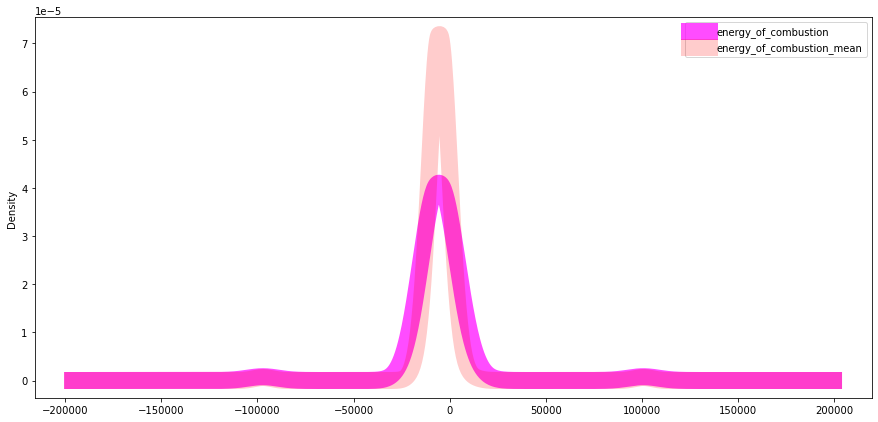

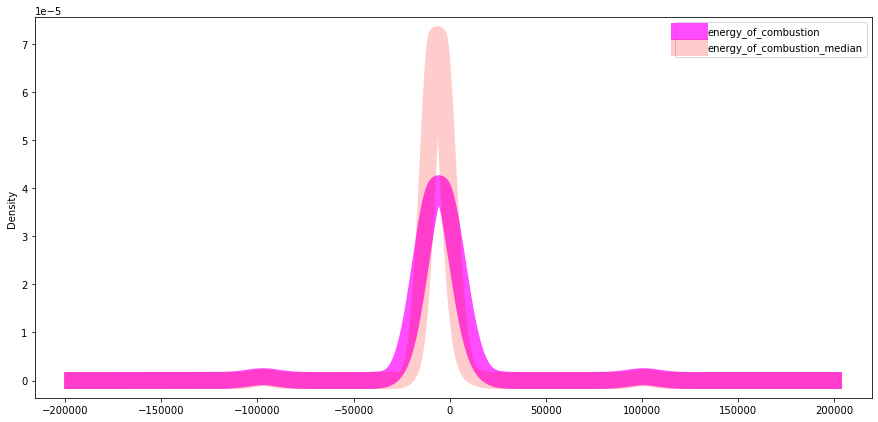

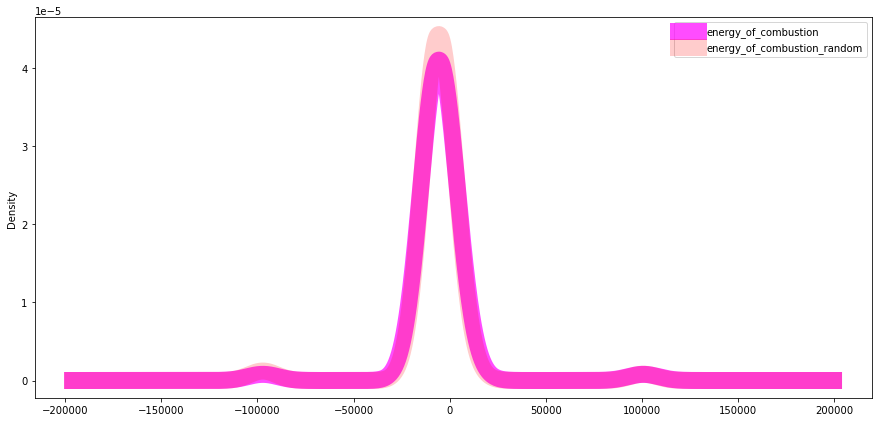

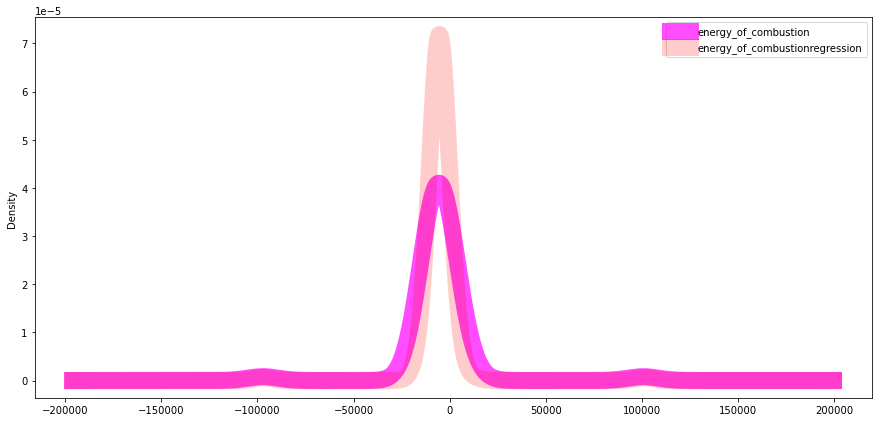

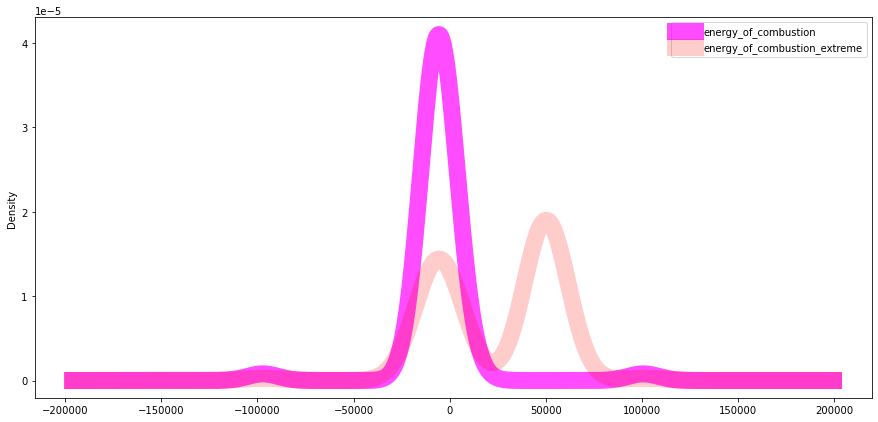

In [32]:
energy_of_combustion_dropped_nan_distribution(df)

In [33]:
def numeric(df):
    '''
    checking null values
    '''
    df_non_numeric = df.select_dtypes(exclude=[np.number])
    
    if df_non_numeric.isnull().sum().sum() > 0:
        total_non_numeric = df_non_numeric.isnull().sum().sort_values(ascending=False) 
        total = total_non_numeric[total_non_numeric > 0]

        percent = df_non_numeric.isnull().mean().sort_values(ascending=False) 
        percent_ready = percent[percent > 0] 

        missing_data_non_numeric = pd.concat([total, percent_ready], axis=1, keys=['Total', 'Percent_ready'])
    
        print(missing_data_non_numeric)


print('Total and Percentage of Missing values in numeric:\n')
non_numeric(df)
print()
print()
print()

numeric(df)

Total and Percentage of Missing values in numeric:

                                               Total  Percent_ready
energy_of_combustion_KNN                          74       0.540146
energy_of_combustion_mode                         74       0.540146
energy_of_combustion_dropped                      74       0.540146
energy_of_combustion                              74       0.540146
energy_of_combustion_ignition_delay               72       0.525547
energy_of_combustion_decomposition_temperture     66       0.481752
energy_of_formation                               48       0.350365
viscosity                                         44       0.321168
ignition_delay                                    25       0.182482
specific_impulse                                  18       0.131387
reference                                          1       0.007299
glass_transition_temperature                       1       0.007299
decomposition_temperture                           1       0.007

In [34]:
var = 'viscosity'

drop_nan(df, var)
impute_nan_mean(df, var)
impute_nan_mode(df, var)
impute_nan_median(df, var)
impute_nan_random(df,var)
impute_KNN(df, var)
impute_ID(df,var, 'ignition_delay')
impute_decomposition_temperture(df,var, 'decomposition_temperture')
Regression(df, var)
impute_col_by_extreme(df, var)

,ID,glass_transition_temperature,decomposition_temperture,density,viscosity,energy_of_formation,energy_of_combustion,ignition_delay,specific_impulse,reference,energy_of_combustion_dropped,energy_of_combustion_mean,energy_of_combustion_mode,energy_of_combustion_median,energy_of_combustion_random,energy_of_combustion_KNN,energy_of_combustion_ignition_delay,energy_of_combustion_decomposition_temperture,energy_of_combustionregression,energy_of_combustion_extreme,viscosity_dropped,viscosity_mean,viscosity_mode,viscosity_median,viscosity_random,viscosity_KNN,viscosity_ignition_delay,viscosity_decomposition_temperture,viscosityregression,viscosity_extreme
2,1.0,-80.0,307.0,0.960,17.3,NaN,NaN,28.0,NaN,26.0,NaN,-5136.509873,NaN,-6270.0,100703.000,NaN,-9200.9,NaN,-5136.509873,50229.062796,17.3,17.300000,17.3,17.3,17.30,17.3,17.30,17.3,17.300000,17.30000
3,2.0,-80.0,222.0,0.910,39.4,NaN,NaN,6.0,NaN,26.0,NaN,-5136.509873,NaN,-6270.0,-14011.600,NaN,NaN,2.564,-5136.509873,50229.062796,39.4,39.400000,39.4,39.4,39.40,39.4,39.40,39.4,39.400000,39.40000
4,3.0,-80.0,189.0,0.930,35.0,NaN,NaN,4.0,NaN,26.0,NaN,-5136.509873,NaN,-6270.0,-7306.200,NaN,-2622.0,NaN,-5136.509873,50229.062796,35.0,35.000000,35.0,35.0,35.00,35.0,35.00,35.0,35.000000,35.00000
5,4.0,-80.0,266.0,0.990,12.4,NaN,NaN,8.0,NaN,26.0,NaN,-5136.509873,NaN,-6270.0,-5439.000,NaN,-6944.0,NaN,-5136.509873,50229.062796,12.4,12.400000,12.4,12.4,12.40,12.4,12.40,12.4,12.400000,12.40000
6,5.0,-80.0,252.0,0.960,19.8,NaN,NaN,18.0,NaN,26.0,NaN,-5136.509873,NaN,-6270.0,-4744.000,NaN,-7306.2,NaN,-5136.509873,50229.062796,19.8,19.800000,19.8,19.8,19.80,19.8,19.80,19.8,19.800000,19.80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,133.0,231.0,234.2,1.221,NaN,NaN,NaN,4.0,NaN,66.0,NaN,-5136.509873,NaN,-6270.0,-7306.200,NaN,-2622.0,NaN,-5136.509873,50229.062796,NaN,716.987957,NaN,43.0,34.73,NaN,32.62,NaN,716.987957,9886.45204
135,134.0,196.7,250.0,1.217,NaN,NaN,NaN,14.0,NaN,66.0,NaN,-5136.509873,NaN,-6270.0,-8605.000,NaN,NaN,NaN,-5136.509873,50229.062796,NaN,716.987957,NaN,43.0,22.00,NaN,35.00,NaN,716.987957,9886.45204
136,135.0,205.2,274.2,1.215,NaN,NaN,NaN,19.0,NaN,66.0,NaN,-5136.509873,NaN,-6270.0,2.555,NaN,-9268.9,NaN,-5136.509873,50229.062796,NaN,716.987957,NaN,43.0,8.40,NaN,170.50,NaN,716.987957,9886.45204
137,136.0,269.3,286.3,1.219,NaN,NaN,NaN,1.0,NaN,66.0,NaN,-5136.509873,NaN,-6270.0,10370.400,NaN,NaN,NaN,-5136.509873,50229.062796,NaN,716.987957,NaN,43.0,21.00,NaN,NaN,NaN,716.987957,9886.45204


In [35]:
def missing(df):

    for column in df.columns[10:]:
        res = df[column].isnull().sum()/df.shape[0]
        print('Missing in ' + column, res)
        
        res = 0

missing(df)

Missing in energy_of_combustion_dropped 0.5401459854014599
Missing in energy_of_combustion_mean 0.0
Missing in energy_of_combustion_mode 0.5401459854014599
Missing in energy_of_combustion_median 0.0
Missing in energy_of_combustion_random 0.0
Missing in energy_of_combustion_KNN 0.5401459854014599
Missing in energy_of_combustion_ignition_delay 0.5255474452554745
Missing in energy_of_combustion_decomposition_temperture 0.48175182481751827
Missing in energy_of_combustionregression 0.0
Missing in energy_of_combustion_extreme 0.0
Missing in viscosity_dropped 0.32116788321167883
Missing in viscosity_mean 0.0
Missing in viscosity_mode 0.32116788321167883
Missing in viscosity_median 0.0
Missing in viscosity_random 0.0
Missing in viscosity_KNN 0.32116788321167883
Missing in viscosity_ignition_delay 0.35766423357664234
Missing in viscosity_decomposition_temperture 0.29927007299270075
Missing in viscosityregression 0.0
Missing in viscosity_extreme 0.0


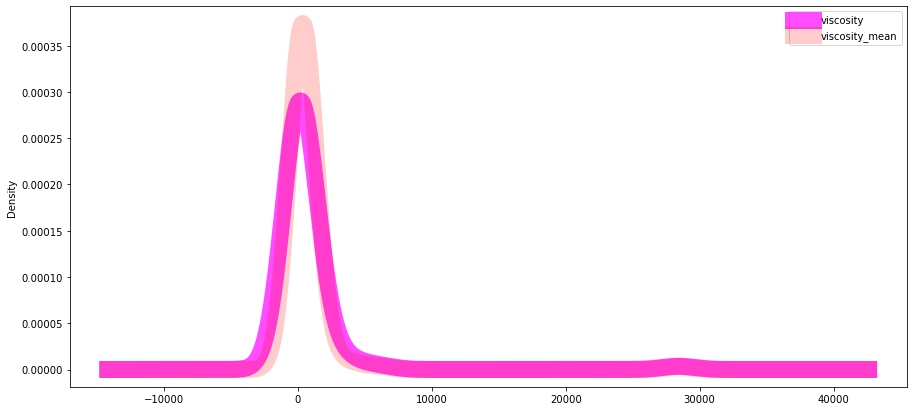

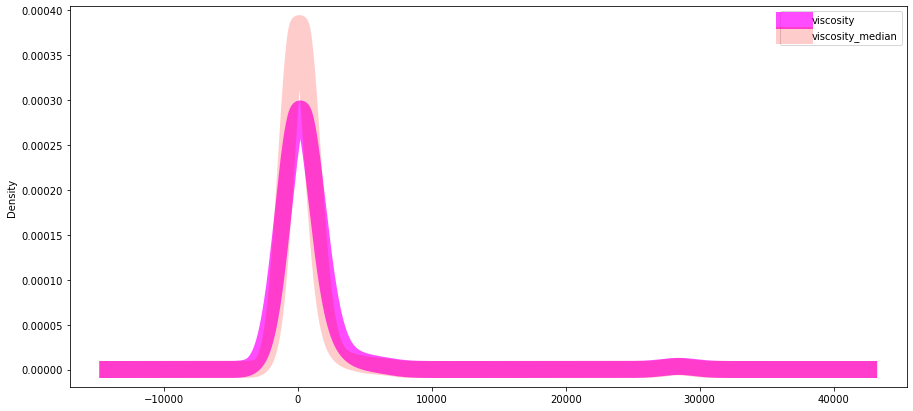

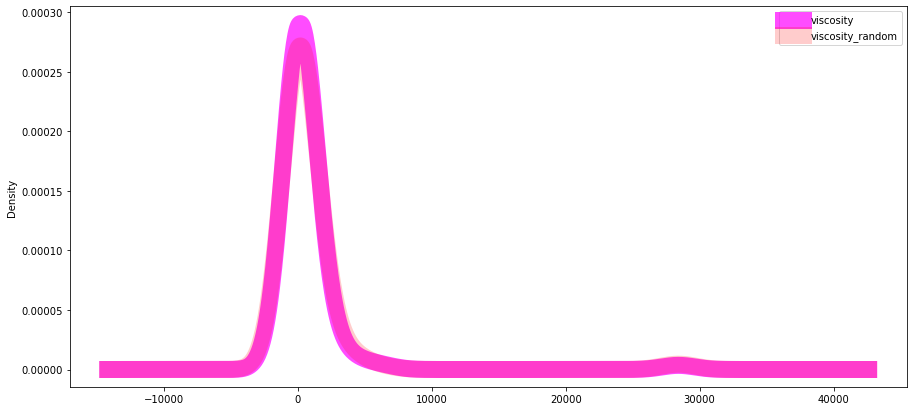

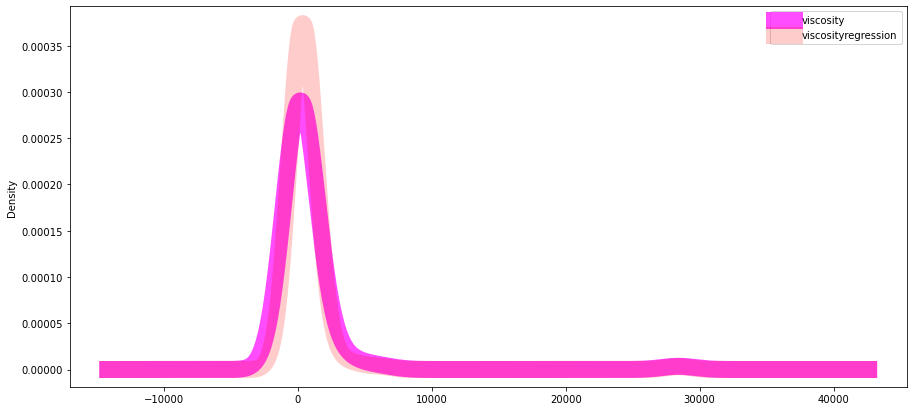

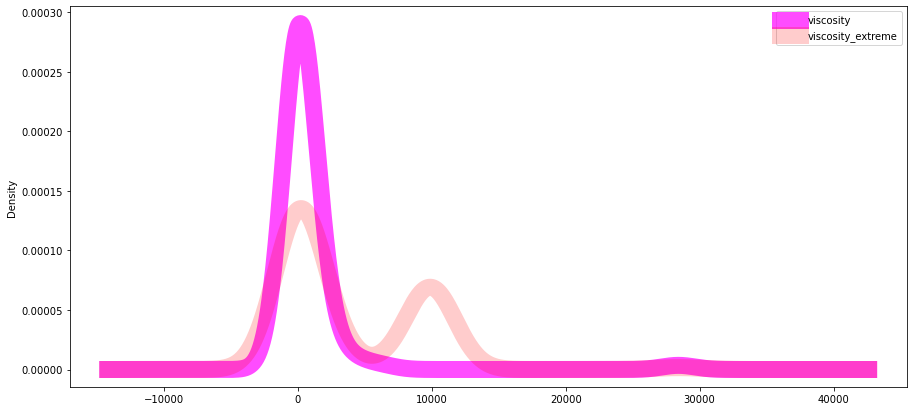

In [36]:
def viscosity_dropped_nan_distribution(df):
    
    columns_to_plot = ['viscosity_mean',
            'viscosity_median',
           'viscosity_random', 
          
           'viscosityregression', 'viscosity_extreme']

    import matplotlib.pyplot as plt


    for col in columns_to_plot:


        fig = plt.figure(figsize = (15,7))
        ax = fig.add_subplot(111)
        df['viscosity'].plot(kind='kde', ax=ax, color = 'magenta', linewidth=17, alpha=0.7)
        df[col].plot(kind='kde', ax=ax, color='red', linewidth=17, alpha=0.2)

        lines, labels = ax.get_legend_handles_labels()
        ax.legend(lines, labels, loc='best')
        
viscosity_dropped_nan_distribution(df)

Random is the best

In [38]:
var = 'ignition_delay'

drop_nan(df, var)
impute_nan_mean(df, var)
impute_nan_mode(df, var)
impute_nan_median(df, var)
impute_nan_random(df,var)
impute_KNN(df, var)
impute_ID(df,var, 'decomposition_temperture')
impute_decomposition_temperture(df,var, 'density')
Regression(df, var)
impute_col_by_extreme(df, var)

,ID,glass_transition_temperature,decomposition_temperture,density,viscosity,energy_of_formation,energy_of_combustion,ignition_delay,specific_impulse,reference,energy_of_combustion_dropped,energy_of_combustion_mean,energy_of_combustion_mode,energy_of_combustion_median,energy_of_combustion_random,energy_of_combustion_KNN,energy_of_combustion_ignition_delay,energy_of_combustion_decomposition_temperture,energy_of_combustionregression,energy_of_combustion_extreme,viscosity_dropped,viscosity_mean,viscosity_mode,viscosity_median,viscosity_random,viscosity_KNN,viscosity_ignition_delay,viscosity_decomposition_temperture,viscosityregression,viscosity_extreme,ignition_delay_dropped,ignition_delay_mean,ignition_delay_mode,ignition_delay_median,ignition_delay_random,ignition_delay_KNN,ignition_delay_decomposition_temperture,ignition_delay_density,ignition_delayregression,ignition_delay_extreme
2,1.0,-80.0,307.0,0.960,17.3,NaN,NaN,28.0,NaN,26.0,NaN,-5136.509873,NaN,-6270.0,100703.000,NaN,-9200.9,NaN,-5136.509873,50229.062796,17.3,17.300000,17.3,17.3,17.30,17.3,17.30,17.3,17.300000,17.30000,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0
3,2.0,-80.0,222.0,0.910,39.4,NaN,NaN,6.0,NaN,26.0,NaN,-5136.509873,NaN,-6270.0,-14011.600,NaN,NaN,2.564,-5136.509873,50229.062796,39.4,39.400000,39.4,39.4,39.40,39.4,39.40,39.4,39.400000,39.40000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
4,3.0,-80.0,189.0,0.930,35.0,NaN,NaN,4.0,NaN,26.0,NaN,-5136.509873,NaN,-6270.0,-7306.200,NaN,-2622.0,NaN,-5136.509873,50229.062796,35.0,35.000000,35.0,35.0,35.00,35.0,35.00,35.0,35.000000,35.00000,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5,4.0,-80.0,266.0,0.990,12.4,NaN,NaN,8.0,NaN,26.0,NaN,-5136.509873,NaN,-6270.0,-5439.000,NaN,-6944.0,NaN,-5136.509873,50229.062796,12.4,12.400000,12.4,12.4,12.40,12.4,12.40,12.4,12.400000,12.40000,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
6,5.0,-80.0,252.0,0.960,19.8,NaN,NaN,18.0,NaN,26.0,NaN,-5136.509873,NaN,-6270.0,-4744.000,NaN,-7306.2,NaN,-5136.509873,50229.062796,19.8,19.800000,19.8,19.8,19.80,19.8,19.80,19.8,19.800000,19.80000,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,133.0,231.0,234.2,1.221,NaN,NaN,NaN,4.0,NaN,66.0,NaN,-5136.509873,NaN,-6270.0,-7306.200,NaN,-2622.0,NaN,-5136.509873,50229.062796,NaN,716.987957,NaN,43.0,34.73,NaN,32.62,NaN,716.987957,9886.45204,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
135,134.0,196.7,250.0,1.217,NaN,NaN,NaN,14.0,NaN,66.0,NaN,-5136.509873,NaN,-6270.0,-8605.000,NaN,NaN,NaN,-5136.509873,50229.062796,NaN,716.987957,NaN,43.0,22.00,NaN,35.00,NaN,716.987957,9886.45204,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
136,135.0,205.2,274.2,1.215,NaN,NaN,NaN,19.0,NaN,66.0,NaN,-5136.509873,NaN,-6270.0,2.555,NaN,-9268.9,NaN,-5136.509873,50229.062796,NaN,716.987957,NaN,43.0,8.40,NaN,170.50,NaN,716.987957,9886.45204,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
137,136.0,269.3,286.3,1.219,NaN,NaN,NaN,1.0,NaN,66.0,NaN,-5136.509873,NaN,-6270.0,10370.400,NaN,NaN,NaN,-5136.509873,50229.062796,NaN,716.987957,NaN,43.0,21.00,NaN,NaN,NaN,716.987957,9886.45204,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [39]:
df.columns[50:]


def missing(df):

    for column in df.columns[30:]:
        res = df[column].isnull().sum()/df.shape[0]
        print('Missing in ' + column, res)
        
        res = 0

missing(df)

Missing in ignition_delay_dropped 0.18248175182481752
Missing in ignition_delay_mean 0.0
Missing in ignition_delay_mode 0.18248175182481752
Missing in ignition_delay_median 0.0
Missing in ignition_delay_random 0.0
Missing in ignition_delay_KNN 0.18248175182481752
Missing in ignition_delay_decomposition_temperture 0.1386861313868613
Missing in ignition_delay_density 0.08759124087591241
Missing in ignition_delayregression 0.0
Missing in ignition_delay_extreme 0.0


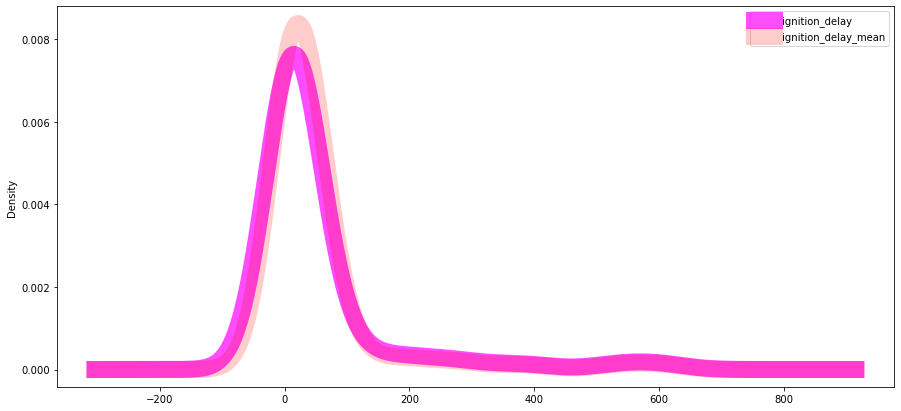

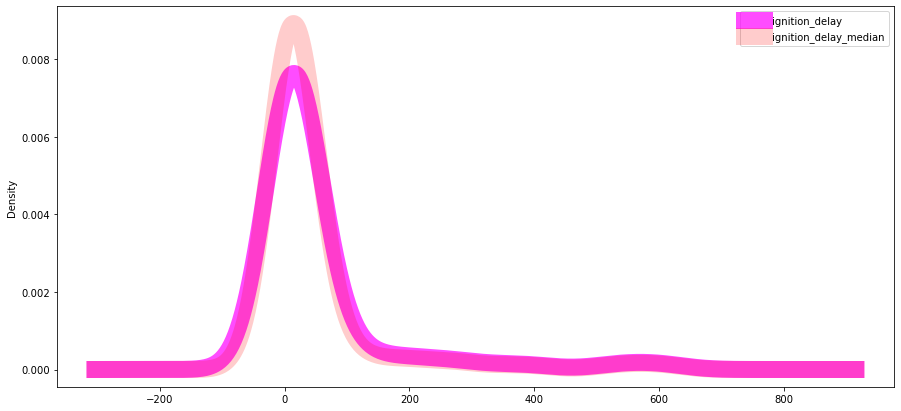

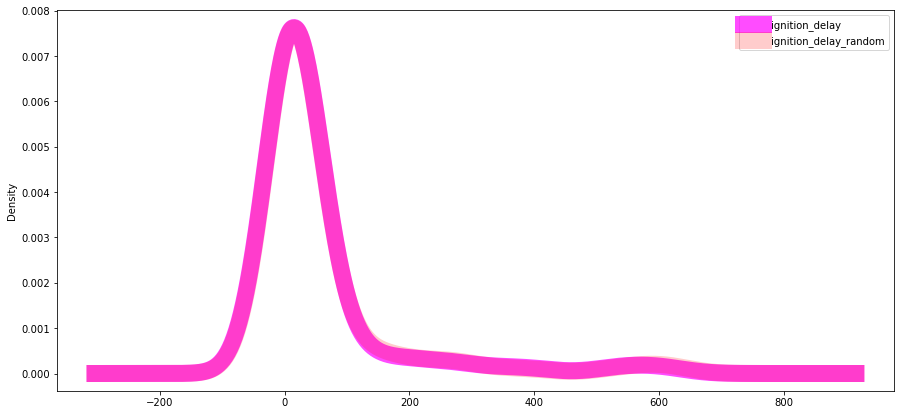

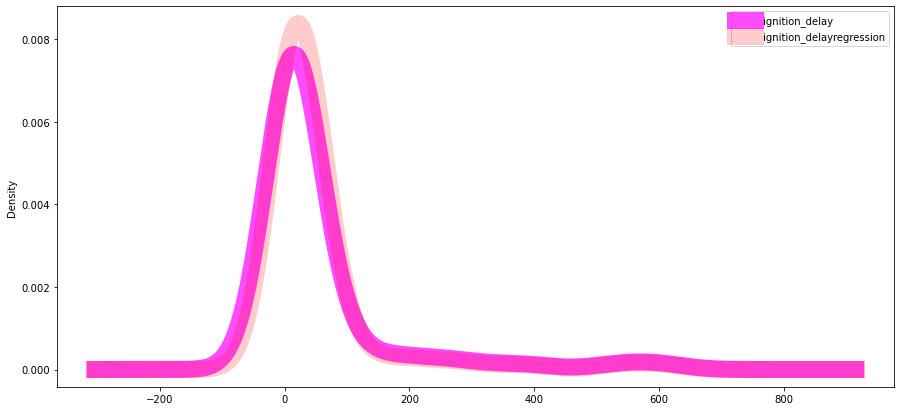

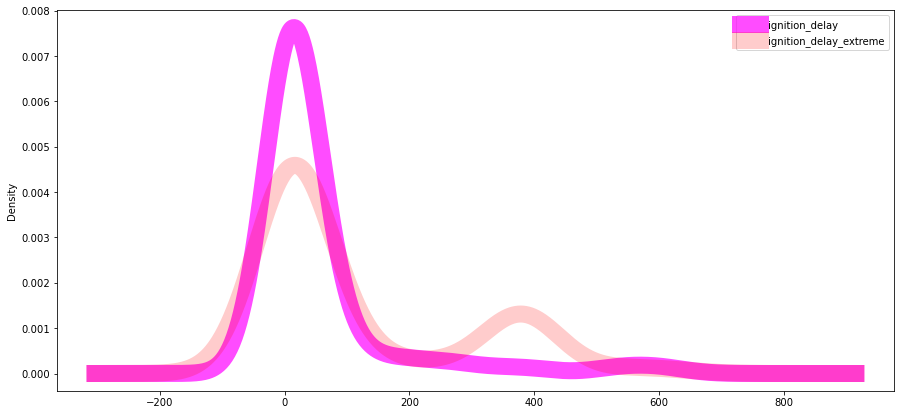

In [40]:
def viscosity_dropped_nan_distribution(df):
    
    columns_to_plot = ['ignition_delay_mean',
            'ignition_delay_median',
           'ignition_delay_random', 
          
           'ignition_delayregression', 'ignition_delay_extreme']

    import matplotlib.pyplot as plt


    for col in columns_to_plot:


        fig = plt.figure(figsize = (15,7))
        ax = fig.add_subplot(111)
        df['ignition_delay'].plot(kind='kde', ax=ax, color = 'magenta', linewidth=17, alpha=0.7)
        df[col].plot(kind='kde', ax=ax, color='red', linewidth=17, alpha=0.2)

        lines, labels = ax.get_legend_handles_labels()
        ax.legend(lines, labels, loc='best')
        
viscosity_dropped_nan_distribution(df)

In [41]:
df['decomposition_temperture'] = df['decomposition_temperture'].fillna(df['energy_of_combustion'].median())

In [42]:
df_final = df[['ID', 'energy_of_combustion_random', 'ignition_delay_random',\
               'viscosity_random', 'decomposition_temperture', 'density']]

In [43]:
df_final.head()

,ID,energy_of_combustion_random,ignition_delay_random,viscosity_random,decomposition_temperture,density
2,1.0,100703.0,28.0,17.3,307.0,0.96
3,2.0,-14011.6,6.0,39.4,222.0,0.91
4,3.0,-7306.2,4.0,35.0,189.0,0.93
5,4.0,-5439.0,8.0,12.4,266.0,0.99
6,5.0,-4744.0,18.0,19.8,252.0,0.96


In [44]:
df_final['ID'] = df_final['ID'].astype(int)
df_final = df_final.set_index('ID')
df_final.columns = ['energy_of_combustion', 'ignition_delay','viscosity', 'decomposition_temperture', 'density']

In [91]:
df = pd.read_excel(r'C:\Users\valer\Desktop\Projects\liquids\ready.xlsx')

In [92]:
df.columns = df.iloc[2]
df1 = df.iloc[:, 3:]
df1 = df1.fillna(0)
df2 = df1.iloc[3:, :]
df3 = df2.rename(columns={df2.columns[-1]: "ID"})


for col in df3.columns:
    df3[col] = df3[col].astype(int)

In [93]:
df3.columns = ['Copper', 'Nikel', 'Zink', 'Pyridine', 'Imidazole', 'Methyl', 'Butyl',
       'Nitrogen', 'Amino', 'Acrilonitrile', 'Methylacetylene', 'Pyrrolidine',
       'Propene ', 'Ethene', 'Azole', 'Ethyl', 'Chloride', 'Ethene_anion', 'Boron dihydride',
       'Penthyl', 'Octyl', 'Propyl', 'Phosphorus', 'Phenyl', 'Nitrogen_anion', 'Tetrazole',
       'Triazole', 'Boron trihydride', 'Ciano', 'Nitrogen dioxide', 'Boron dihydride_anion', 
        'Decahydrodecaborate', 'Dodecaborate', 'Borohydride',
       'ID']

In [94]:
cols_cation = [i+'_'+'cation' for i in df3.columns[:17]]
cols_cation = [i.replace(' ', '') for i in cols_cation]


cols_anion = [i.replace(' ', '') for i in df3.columns[17:]]
cols_anion = [i.replace('_anion', '') for i in df3.columns[17:]]
cols_anion = [i+'_'+'anion' for i in df3.columns[17:]]

In [95]:
df3.columns = cols_cation + cols_anion

In [96]:
df3.rename(columns = {'Nitrogen_anion_anion':'Nitrogen_anion', 'dihydride_anion_anion':'dihydride_anion'}, inplace = True)
df3.rename(columns = {'Boron dihydride_anion_anion':'Boron_dihydride_anion', 'Ethene_anion_anion':'Ethene_anion'}, inplace = True)

In [97]:
df3.columns = [i.replace(' ','_') for i in df3.columns]

In [98]:
start = []
for col in df3.columns:
    if col.endswith('anion'):
        start.append(col)
        
len(start)

18

In [99]:
cat = []
for col in df3.columns:
    if col.endswith('cation'):
        cat.append(col)
        
len(cat)

17

In [100]:
df3

,Copper_cation,Nikel_cation,Zink_cation,Pyridine_cation,Imidazole_cation,Methyl_cation,Butyl_cation,Nitrogen_cation,Amino_cation,Acrilonitrile_cation,Methylacetylene_cation,Pyrrolidine_cation,Propene_cation,Ethene_cation,Azole_cation,Ethyl_cation,Chloride_cation,Ethene_anion,Boron_dihydride_anion,Penthyl_anion,Octyl_anion,Propyl_anion,Phosphorus_anion,Phenyl_anion,Nitrogen_anion,Tetrazole_anion,Triazole_anion,Boron_trihydride_anion,Ciano_anion,Nitrogen_dioxide_anion,Boron_dihydride_anion,Decahydrodecaborate_anion,Dodecaborate_anion,Borohydride_anion,ID_anion
3,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,28
4,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,6
5,0,0,0,0,0,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,4
6,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,8
7,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,0,0,0,4,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
107,0,0,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,14
108,0,0,1,0,4,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,19
109,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [106]:
df_left = df3.iloc[:, :18]
df_right = df3.iloc[:, 19:]

df3 = pd.concat([df_left, df_right], axis = 1)

In [107]:
X = df3.drop('ID_anion', axis = 1)
y = df3['ID_anion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature Selection

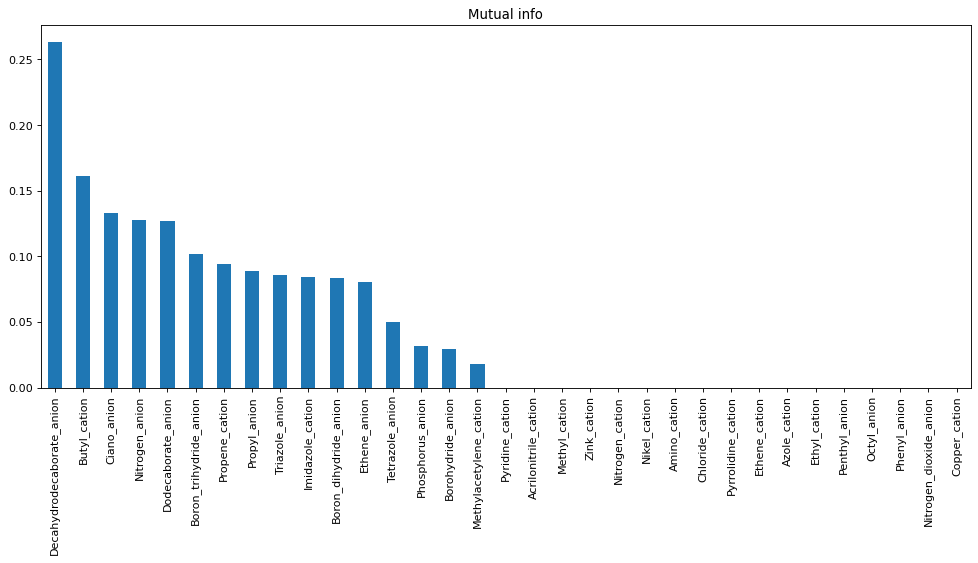

In [108]:
#mutual info

from matplotlib.pyplot import figure

figure(figsize=(15, 6), dpi=80)


from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info_series = pd.Series(mutual_info)
mutual_info_series.index = X_train.columns
mutual_info_series.sort_values(ascending=False).plot(kind='bar')
plt.title('Mutual info')
plt.show()

Looks like Borate anions are the crucial ones

In [112]:
df3.columns

Index(['Copper_cation', 'Nikel_cation', 'Zink_cation', 'Pyridine_cation',
       'Imidazole_cation', 'Methyl_cation', 'Butyl_cation', 'Nitrogen_cation',
       'Amino_cation', 'Acrilonitrile_cation', 'Methylacetylene_cation',
       'Pyrrolidine_cation', 'Propene_cation', 'Ethene_cation', 'Azole_cation',
       'Ethyl_cation', 'Chloride_cation', 'Ethene_anion', 'Penthyl_anion',
       'Octyl_anion', 'Propyl_anion', 'Phosphorus_anion', 'Phenyl_anion',
       'Nitrogen_anion', 'Tetrazole_anion', 'Triazole_anion',
       'Boron_trihydride_anion', 'Ciano_anion', 'Nitrogen_dioxide_anion',
       'Boron_dihydride_anion', 'Decahydrodecaborate_anion',
       'Dodecaborate_anion', 'Borohydride_anion', 'ID_anion'],
      dtype='object')

# Model Building

In [109]:
X_train.columns

Index(['Copper_cation', 'Nikel_cation', 'Zink_cation', 'Pyridine_cation',
       'Imidazole_cation', 'Methyl_cation', 'Butyl_cation', 'Nitrogen_cation',
       'Amino_cation', 'Acrilonitrile_cation', 'Methylacetylene_cation',
       'Pyrrolidine_cation', 'Propene_cation', 'Ethene_cation', 'Azole_cation',
       'Ethyl_cation', 'Chloride_cation', 'Ethene_anion', 'Penthyl_anion',
       'Octyl_anion', 'Propyl_anion', 'Phosphorus_anion', 'Phenyl_anion',
       'Nitrogen_anion', 'Tetrazole_anion', 'Triazole_anion',
       'Boron_trihydride_anion', 'Ciano_anion', 'Nitrogen_dioxide_anion',
       'Boron_dihydride_anion', 'Decahydrodecaborate_anion',
       'Dodecaborate_anion', 'Borohydride_anion'],
      dtype='object')

In [110]:
#creating a dictionary of the models(estimators) 
estimators = {
    'Linear Regression': [LinearRegression()],
    'Lasso' :[Lasso()],
    'Ridge' :[Ridge()],
    'KNN' :[KNeighborsRegressor()],
    'Decision Tree' :[DecisionTreeRegressor()],
    'Ransom Forest' :[RandomForestRegressor()],
    'XG Boost': [XGBRegressor()],
}

#writing a function to fit models above to the train dataset
def mfit(estimators, X_train, y_train):
    for m in estimators:
        estimators[m][0].fit(X_train, y_train)
        print(m+' fitted')

mfit(estimators, X_train, y_train)

Linear Regression fitted
Lasso fitted
Ridge fitted
KNN fitted
Decision Tree fitted
Ransom Forest fitted
XG Boost fitted


# End of the first part